In [13]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt

class Road:
    def __init__(self):
        self.length = 1000
        self.road_entrance


class Car:
    def __init__(self, position, next_car, current_speed=0):
        self.max_speed = 33.33  # m/s
        self.current_speed = current_speed  # all cars start at a dead stop
        self.acceleration_rate = 2  # +2 per second
        self.position = position
        self.next_car = next_car
        self.length = 5

#  decides if the driver slows down, speeds up, or
#  first round, if cars start at 0, chance a car rolls a 1 and has "slows" from speed of 0 m/s"""
    def acceleration(self):
        if random.randint(1, 10) == 1:
            self.acceleration_rate = -2
            return self.acceleration_rate
        else:
            self.acceleration_rate = 2
            return self.acceleration_rate

# update current speed
    def updates_speed(self):
        """added if/else block to control for max speed"""
        # print('original speed: ', self.current_speed)
        acceleration_variable = self.acceleration()
        if self.current_speed + acceleration_variable >= 33:
            self.current_speed = self.max_speed
        else:
            self.current_speed = self.current_speed + acceleration_variable

        if self.current_speed < 0:
            self.current_speed = 0
        # print('acceleration rate: ', acceleration_variable)
        # print('updated speed: ', self.current_speed)
        return self.current_speed

# moves one car object
    """added condition to loop around"""
    def move_car(self):
        if self.position + self.current_speed >= 1000:
            self.position = self.current_speed - (1000 - self.position)
        else:
            self.if_car_is_too_close()
            # print("car too close",self.current_speed)
            self.position = self.position + self.current_speed
        return self.position

# calculates the distance between current car and next car
    def distance_between_car_in_front(self):
        # print("current1", round(self.position, 2), "next car pos1", round(self.next_car.position, 2))
        if self.next_car.position < self.position:
            return 1000 - self.position + self.next_car.position
        else:
            return self.next_car.position - self.position - self.length

    def if_car_is_too_close(self):
            distance = self.distance_between_car_in_front()
            # print("distance", round(distance, 2))

            if distance < self.current_speed:
                if self.current_speed == self.avoid_collision():
                    self.current_speed = 0
                else:
                    self.current_speed = distance
            else:
                return self.current_speed

# determines if the car will overtake the car in front of it in the next second. If so, car stops.
    def avoid_collision(self):
        if self.position + self.current_speed >= 1000:
            if self.current_speed - (1000 - self.position) >= self.next_car.current_speed - (1000 - self.next_car.position):
                self.current_speed = 0
                return self.current_speed
        else:
            if self.position + self.current_speed >= self.next_car.position + self.next_car.current_speed:
                self.current_speed = 0
                return self.current_speed
            else:
                return self.current_speed

class Simulation:

    def __init__(self):
        self.number_of_cars = 30

    def create_starting_position(self):
        x = 0
        position_list = []
        for _ in range(self.number_of_cars):
            position_list.append(x)
            x += round((1000/self.number_of_cars), 2)
        return position_list

# create cars object and links the car to the next car
    def create_cars(self, position_list):
        cars = []

        next_car = None
        # print("position_list", position_list)
        position_list.reverse()
        for position in position_list:
            car = Car(position, next_car)
            next_car = car
            cars.append(car)

        cars[0].next_car = cars[-1]
        cars.reverse()

        return cars

    def set_cars(self, cars):
        #  moves all cars in the simulation
        counter = 0
        list_of_movements_by_car = []
        for car in cars:
            counter += 1
            # print('count: ', counter)
            # print("next car:", round(car.next_car.position, 2))
            move_car = car.move_car()
            # print("move car: ", round(move_car, 2))
            # print("current pos", round(car.position, 2))
            car.current_speed = car.updates_speed()  # RETURNS CURRENT SPEED. changes m/s to current speed plus acceleration
            # print("current speed: ", car.current_speed)
            # print("____")
            list_of_movements_by_car.append(round(car.position, 2))
        return move_car, list_of_movements_by_car

    def run_one_minute(self, cars):
        list_of_movements_in_a_turn = []
        # list_of_seconds_in_a_turn = []
        # zipped_list = []
        count_time = 0
        for _ in range(60):
            move_car, list_of_movements_by_car = self.set_cars(cars)
            count_time += 1
            list_of_movements_in_a_turn.append(list_of_movements_by_car)
            list_of_movements_in_a_turn.append([count_time] * len(list_of_movements_by_car))
            # list_of_seconds_in_a_turn.append(list(range(60)))
            # print("~~~~~~~~~~~~")
        # print(list_of_movements_in_a_turn)
        return list_of_movements_in_a_turn


def main():
    list_simulation_results = []
    list_of_times = []
    list_of_times_master = []
    list_of_distances = []
    list_of_distances_master = []
    simulation = Simulation()
    starting_position = simulation.create_starting_position()
    cars = simulation.create_cars(starting_position)
    for _ in range(1000):
        list_of_movements_in_a_turn = simulation.run_one_minute(cars)
        list_simulation_results.append(list_of_movements_in_a_turn)
    # print(list_simulation_results)
    for list1 in list_simulation_results:
        for list2 in list1:
            list_of_times = list1[1::2]
            list_of_distances = list1[0::2]
    for index in list_of_times:
        for value in index:
            list_of_times_master.append(value)
    for index2 in list_of_distances:
        for value2 in index2:
            list_of_distances_master.append(value2)
    print(len(list_of_times_master))
    print(len(list_of_distances_master))
    return list_simulation_results, list_of_times_master, list_of_distances_master



if __name__ == "__main__":
    list_simulation_results, list_of_times_master, list_of_distances_master = main()

1800
1800


In [14]:
%matplotlib inline

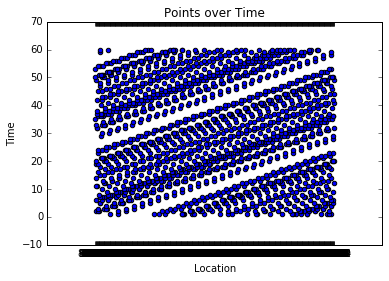

In [15]:
x1 = list_of_distances_master
y1 = list_of_times_master
plt.scatter(x1, y1)
plt.xticks(range(1000), x1)
plt.locator_params(axis='y1', nbins=60)
plt.locator_params(axis='x1', nbins=100)
plt.xlabel("Location")
plt.ylabel("Time")
plt.title("Points over Time")
plt.show()